![](header.jpg)

# k-Fold Cross Validation


---

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

- Creates *n* training test folds and train the model on multiple test sets to avoid over fitting

## References

- wikipedia: [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)

In [15]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from colorama import Fore

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [18]:
def evaluate(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("-------------------")
    print(f"{Fore.GREEN}True Positives (TP): {cm[0,0]}")
    print(f"True Negatives (TN): {cm[1,1]}")
    print(f"{Fore.RED}False Positives (FP): {cm[0,1]}")
    print(f"False Negatives (FN): {cm[1,0]}{Fore.RESET}")
    print("-------------------")
    print(f"Accuracy: {100*accuracy_score(y_test, y_pred)}%")

In [4]:
dataset = pd.read_csv('../datasets/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
# split data into test and training
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Mean values are: [0. 0.]


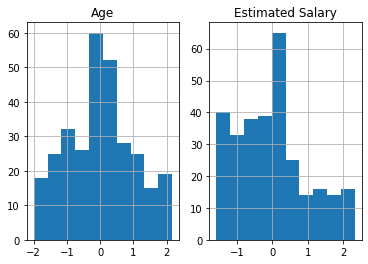

In [11]:
mv = np.mean(X_train,axis=0)
print(f"Mean values are: {mv}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.title("Age");

plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True)
plt.title("Estimated Salary");

## Training the Kernel SVM model on the Training set

In [19]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

evaluate(y_test, y_pred)

Confusion Matrix:
 [[64  4]
 [ 3 29]]
-------------------
True Positives (TP): 64
True Negatives (TN): 29
False Positives (FP): 4
False Negatives (FN): 3
-------------------
Accuracy: 93.0%


## Applying k-Fold Cross Validation

In [7]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f"Accuracy: {accuracies.mean()*100:.2f} %")
print(f"Standard Deviation: {accuracies.std()*100:.2f} %")

Accuracy: 90.33 %
Standard Deviation: 6.57 %


In [27]:
def plot(classifier, X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

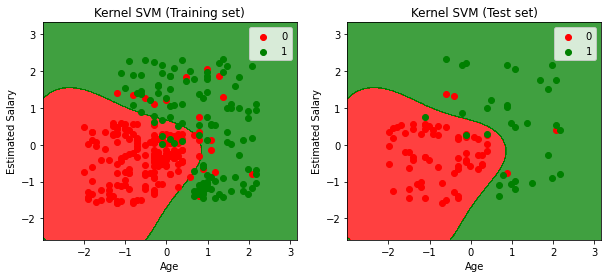

In [30]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(121)
plot(classifier, X_train, y_train, 'Kernel SVM (Training set)')
plt.subplot(122)
plot(classifier, X_test, y_test, 'Kernel SVM (Test set)')